код для форматирования объектов sympy на latex и mathjax

In [23]:
from sympy import *
from sympy.printing.latex import LatexPrinter

class CustomLatexPrinter(LatexPrinter):
    def _print_Idx(self, expr):
        return expr.name

    @classmethod
    def printer(cls, expr, **kwargs):
        return cls(kwargs).doprint(expr)

init_printing(use_latex='mathjax', latex_printer=CustomLatexPrinter.printer)

<IPython.core.display.Latex object>

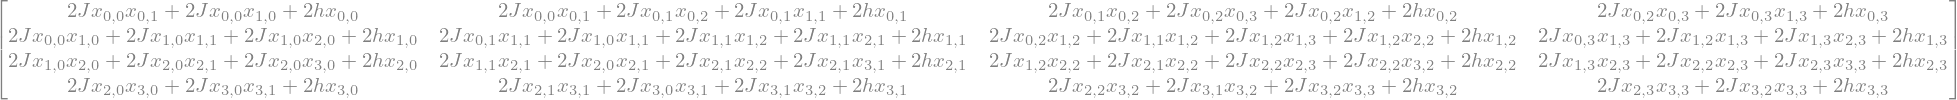

<IPython.core.display.Latex object>

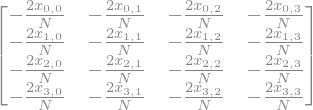

In [95]:
var('J h N')
x = IndexedBase('x')

n = 4

x = Matrix([[x[i, j] for j in range(n)] for i in range(n)])
dE = Matrix([[0] * n] * n)
dM = Matrix([[0] * n] * n)

for i in range(n):
    for j in range(n):
        x_tr = x.copy()
        x_tr[i, j] = - x_tr[i, j]
        
        def calc_E(x):
            s0 = 0
            for i in range(n - 1):
                for j in range(n - 1):
                    s0 += x[i + 1, j] * x[i, j] + x[i, j + 1] * x[i, j]
            
            i = n - 1
            for j in range(n - 1):
                s0 += x[i, j + 1] * x[i, j]
            
            j = n - 1
            for i in range(n - 1):
                s0 += x[i + 1, j] * x[i, j]

            s1 = 0
            for i in range(n):
                for j in range(n):
                    s1 += x[i, j]
            
            E = - J * s0 - h * s1
            
            return E
        
        def calc_M(x):
            M = 0
            for i in range(n):
                for j in range(n):
                    M += 1 / N * x[i, j]
            
            return M
        
        dE[i, j] = calc_E(x_tr) - calc_E(x)
        dM[i, j] = calc_M(x_tr) - calc_M(x)

dE_exact = expand(dE)
dM_exact = expand(dM)
from IPython.display import Latex
display(Latex('$dE = $'), dE_exact, Latex('$dM = $'), dM_exact)

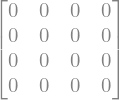

In [61]:
x_ = IndexedBase('x')
x = zeros(n + 1)
x[:-1, :-1] = Matrix([[x_[i, j] for j in range(n)] for i in range(n)])
dE = zeros(n)

for i in range(n):
    for j in range(n):
        x_tr = x.copy()
        x_tr[i, j] = - x_tr[i, j]

        def calc_E(x):
            E = 0
            for i in range(n):
                for j in range(n):
                    E += - J * (x[i + 1, j] * x[i, j] + x[i, j + 1] * x[i, j]) - h * x[i, j]

            return E

        dE[i, j] = calc_E(x_tr) - calc_E(x)

expand(dE) - dE_exact

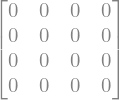

In [60]:
import numpy as np

x_ = IndexedBase('x')
x = zeros(n + 1)
x[:-1, :-1] = Matrix([[x_[i, j] for j in range(n)] for i in range(n)])
dE = zeros(n)

x = np.array(x)

for i in range(n):
    for j in range(n):
        x_tr = x.copy()
        x_tr[i, j] = - x_tr[i, j]

        def calc_E(x):
            E = - J * (x[:-1, 1:] * x[:-1, :-1] + x[1:, :-1] * x[:-1, :-1]).sum() - h * x.sum()

            return E

        dE[i, j] = calc_E(x_tr) - calc_E(x)

expand(dE) - dE_exact

In [27]:
x = IndexedBase('x')
i, j = symbols('i j', cls=Idx)

dE_exact[1, 1].subs({x[i_, j_]: x[i + (i_ - 1), j + (j_ - 1)] for i_ in range(n) for j_ in range(n)})

2⋅J⋅x[i + 1, j]⋅x[i, j] + 2⋅J⋅x[i - 1, j]⋅x[i, j] + 2⋅J⋅x[i, j + 1]⋅x[i, j] + 2⋅J⋅x[i,
 j - 1]⋅x[i, j] + 2⋅h⋅x[i, j]

In [28]:
repr(_)

'2*J*x[i + 1, j]*x[i, j] + 2*J*x[i - 1, j]*x[i, j] + 2*J*x[i, j + 1]*x[i, j] + 2*J*x[i, j - 1]*x[i, j] + 2*h*x[i, j]'

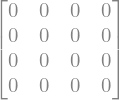

In [88]:
x_ = IndexedBase('x')
x = zeros(n + 1)
x[:-1, :-1] = Matrix([[x_[i, j] for j in range(n)] for i in range(n)])
dE = zeros(n)

for i in range(n):
    for j in range(n):
        dE[i, j] = 2 * J * (x[i + 1, j]*x[i, j] + x[i - 1, j]*x[i, j] + x[i, j + 1]*x[i, j] + x[i, j - 1]*x[i, j]) + 2 * h * x[i, j]

expand(dE) - dE_exact

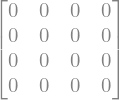

In [96]:
x_ = IndexedBase('x')
x = zeros(n + 2)
x[1:-1, 1:-1] = Matrix([[x_[i, j] for j in range(n)] for i in range(n)])
dE = zeros(n)

for i in range(n):
    for j in range(n):
        i_ = i + 1
        j_ = j + 1

        dE[i, j] = 2 * J * (x[i_ + 1, j_]*x[i_, j_] + x[i_ - 1, j_]*x[i_, j_] + x[i_, j_ + 1]*x[i_, j_] + x[i_, j_ - 1]*x[i_, j_]) + 2 * h * x[i_, j_]

expand(dE) - dE_exact

# Периодические граничные условия

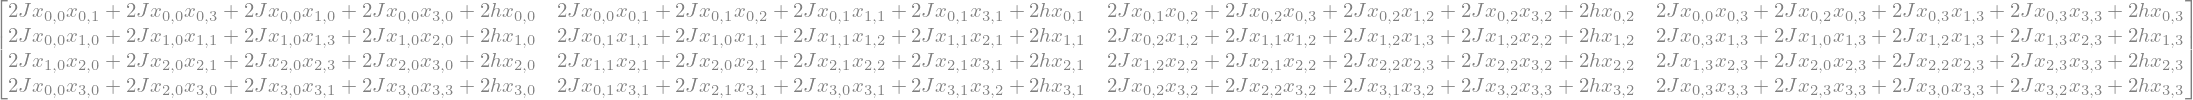

In [113]:
from sympy import *
init_printing()

var('J h')

n = 4

x_ = IndexedBase('x')
x = Matrix([[x_[i, j] for j in range(n)] for i in range(n)])
dE = zeros(n)

for i in range(n):
    for j in range(n):
        x_tr = x.copy()
        x_tr[i, j] = - x_tr[i, j]
        
        def calc_E(x):
            E = 0
            for i in range(n):
                for j in range(n):
                    E += - J * (x[(i + 1) % n, j] * x[i, j] + x[i, (j + 1) % n] * x[i, j]) - h * x[i, j]
            
            return E
        
        dE[i, j] = calc_E(x_tr) - calc_E(x)

dE_exact = expand(dE)
dE_exact

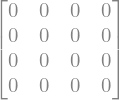

In [100]:
x_ = IndexedBase('x')
x = zeros(n + 1)
x[:-1, :-1] = Matrix([[x_[i, j] for j in range(n)] for i in range(n)])
dE = zeros(n)

for i in range(n):
    for j in range(n):
        x_tr = x.copy()
        x_tr[i, j] = - x_tr[i, j]
        
        def calc_E(x):
            x[n, :] = x[0, :]
            x[:, n] = x[:, 0]

            E = 0
            for i in range(n):
                for j in range(n):
                    E += - J * (x[(i + 1), j] * x[i, j] + x[i, (j + 1)] * x[i, j]) - h * x[i, j]
            
            return E
        
        dE[i, j] = calc_E(x_tr) - calc_E(x)

expand(dE) - dE_exact

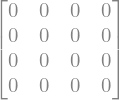

In [101]:
x_ = IndexedBase('x')
x = zeros(n + 2)
x[1:-1, 1:-1] = Matrix([[x_[i, j] for j in range(n)] for i in range(n)])
dE = zeros(n)
x[n + 1, :] = x[1, :]
x[:, n + 1] = x[:, 1]
x[0, :] = x[n, :]
x[:, 0] = x[:, n]

for i in range(n):
    for j in range(n):
        i_ = i + 1
        j_ = j + 1

        dE[i, j] = 2 * J * (x[i_ + 1, j_]*x[i_, j_] + x[i_ - 1, j_]*x[i_, j_] + x[i_, j_ + 1]*x[i_, j_] + x[i_, j_ - 1]*x[i_, j_]) + 2 * h * x[i_, j_]

expand(dE) - dE_exact

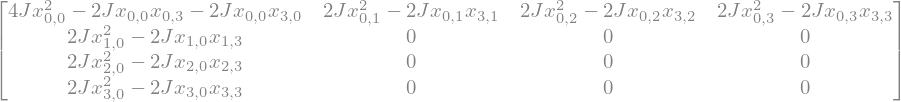

In [102]:
x_ = IndexedBase('x')
x = zeros(n + 1)
x[:-1, :-1] = Matrix([[x_[i, j] for j in range(n)] for i in range(n)])
dE = zeros(n)

x[n, :] = x[0, :]
x[:, n] = x[:, 0]

for i in range(n):
    for j in range(n):        
        dE[i, j] = 2 * J * (x[i + 1, j]*x[i, j] + x[i - 1, j]*x[i, j] + x[i, j + 1]*x[i, j] + x[i, j - 1]*x[i, j]) + 2 * h * x[i, j]

expand(dE) - dE_exact

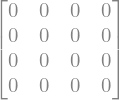

In [81]:
x_ = IndexedBase('x')
x = Matrix([[x_[i, j] for j in range(n)] for i in range(n)])
dE = zeros(n)

for i in range(n):
    for j in range(n):    
        dE[i, j] = 2 * J * (x[(i + 1) % n, j]*x[i, j] + x[i - 1, j]*x[i, j] + x[i, (j + 1) % n]*x[i, j] + x[i, j - 1]*x[i, j]) + 2 * h * x[i, j]

expand(dE) - dE_exact

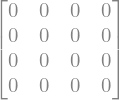

In [118]:
x_ = IndexedBase('x')
x = zeros(n + 1)
x[:-1, :-1] = Matrix([[x_[i, j] for j in range(n)] for i in range(n)])
dE = zeros(n)

for i in range(n):
    for j in range(n):    
        dE[i, j] = 2 * J * (x[(i + 1) % n, j]*x[i, j] + x[(i - 1) % n, j]*x[i, j] + x[i, (j + 1) % n]*x[i, j] + x[i, (j - 1) % n]*x[i, j]) + 2 * h * x[i, j]

expand(dE) - dE_exact

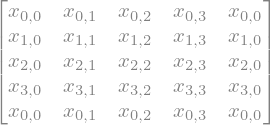

In [78]:
x

# Алгоритм для двух граничных условий

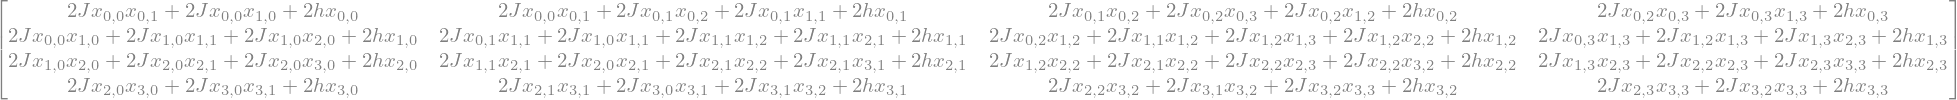

In [116]:
periodic = False
x_ = IndexedBase('x')
x = Matrix([[x_[i, j] for j in range(n)] for i in range(n)])

if not periodic:
    y = zeros(n + 1)
    y[:-1, :-1] = x
    x = y

dE = zeros(n)

for i in range(n):
    for j in range(n):
        if periodic:
            dE[i, j] = 2 * J * (x[(i + 1) % n, j]*x[i, j] + x[i - 1, j]*x[i, j] + x[i, (j + 1) % n]*x[i, j] + x[i, j - 1]*x[i, j]) + 2 * h * x[i, j]
        else:
            dE[i, j] = 2 * J * (x[i + 1, j]*x[i, j] + x[i - 1, j]*x[i, j] + x[i, j + 1]*x[i, j] + x[i, j - 1]*x[i, j]) + 2 * h * x[i, j]

expand(dE)

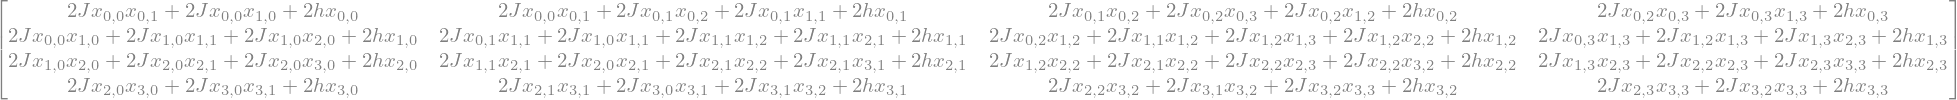

In [116]:
periodic = False
x_ = IndexedBase('x')
x = Matrix([[x_[i, j] for j in range(n)] for i in range(n)])

if not periodic:
    y = zeros(n + 1)
    y[:-1, :-1] = x
    x = y

dE = zeros(n)

for i in range(n):
    for j in range(n):
        if periodic:
            dE[i, j] = 2 * J * (x[(i + 1) % n, j]*x[i, j] + x[i - 1, j]*x[i, j] + x[i, (j + 1) % n]*x[i, j] + x[i, j - 1]*x[i, j]) + 2 * h * x[i, j]
        else:
            dE[i, j] = 2 * J * (x[i + 1, j]*x[i, j] + x[i - 1, j]*x[i, j] + x[i, j + 1]*x[i, j] + x[i, j - 1]*x[i, j]) + 2 * h * x[i, j]

expand(dE)